In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/Housing (1).csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# converting the features into binary format
df['mainroad'] = df['mainroad'].map({'yes':1,'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1,'no':0})
df['basement'] = df['basement'].map({'yes':1,'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1,'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1,'no':0})
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
## 3. Converting funcnishing status to numerical features
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [6]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = np.log(df['price'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.2047538092043193
Mean Squared Error (MSE): 0.06643532902123396
R-squared (R²): 0.6559336836852752


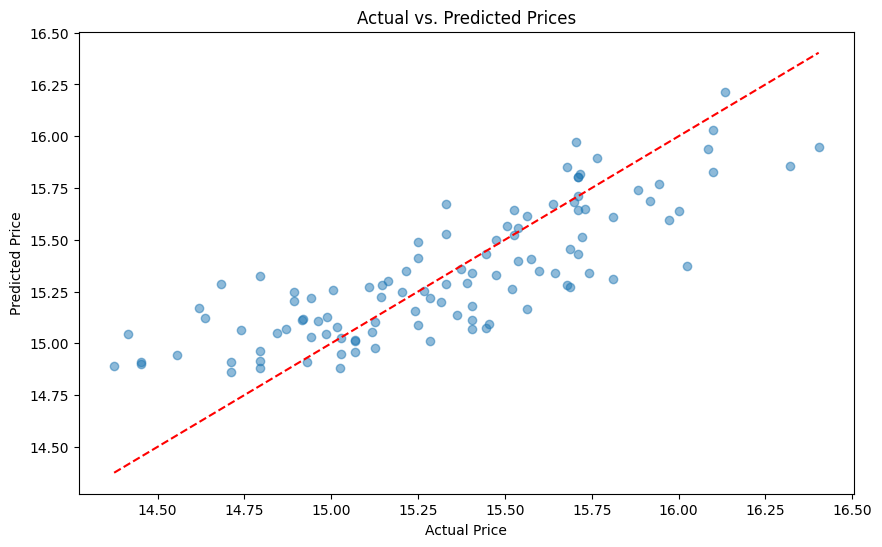

Model Coefficients:
[4.79688807e-05 2.15324710e-02 1.88820304e-01 8.17182045e-02
 1.11159998e-01 5.50234346e-02 1.01033284e-01 1.32345084e-01
 1.53816438e-01 3.75447802e-02 1.25735769e-01 5.71727943e-02]

Model Intercept:
14.301212230625252


In [10]:



plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()

print("Model Coefficients:")
print(model.coef_)
print("\nModel Intercept:")
print(model.intercept_)